In [ ]:
# https://data.boston.gov/dataset/neighborhood-demographics

In [16]:
import pandas as pd
from selenium import webdriver
import os
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re

In [9]:
dwellings = pd.read_csv('listings.csv')
pd.set_option('max_columns', len(dwellings.columns))


In [23]:
'; '.join(dwellings['smart_location'].unique())

'Boston, MA; Roslindale, MA; Roslindale, Boston, MA; Jamaica Plain, MA; Brookline, MA; Jamaica Plain, Boston, MA; Jamaica Plain (Boston), MA; Roxbury Crossing, MA; Jamaica Plain , MA; Jamaica Plain, MA, MA; Boston (Jamaica Plain), MA; Jamaica plain , MA; ROXBURY CROSSING, MA; Mission Hill, Boston, MA; boston, MA; 波士顿, MA; Boston, Massachusetts, US, MA; South End, Boston, MA; Cambridge, MA; East Boston, MA; east Boston , MA; Charlestown, MA; Boston (Charlestown), MA; Somerville, MA; Watertown, MA; Brighton, MA; Brighton , MA; Boston , MA; MA; West Roxbury, MA; Newton, MA; Hyde Park, MA; Mattapan, MA; Milton, MA; Dorchester, MA; dorchester, boston , MA; South Boston, MA; Allston, MA; ALLSTON, MA'

In [37]:
# Separando os dados da coluna 'smart_location'. Existem algumas colunas com (BAIRRO, ESTADO); outras com
                                                                        # (BAIRRO, CIDADE, ESTADO)...
import re
#pattern = '([\w]+)([,\w]+)?,([\w{2};])'
pattern = '([\w ]+)([\w ,]+)?, (\w{2});'
districts = ';'.join(dwellings['smart_location'].unique())
for first, second, third in re.findall(pattern, districts):
    print(first)

Boston
Roslindale
Roslindale
Jamaica Plain
Brookline
Jamaica Plain
Roxbury Crossing
Jamaica Plain 
Jamaica Plain
Jamaica plain 
ROXBURY CROSSING
Mission Hill
boston
波士顿
Boston
South End
Cambridge
East Boston
east Boston 
Charlestown
Somerville
Watertown
Brighton
Brighton 
Boston 
West Roxbury
Newton
Hyde Park
Mattapan
Milton
Dorchester
dorchester
South Boston
Allston


<p style = 'font-size:40px'> 1) Casas sem bairro.</p>

In [44]:
from selenium import webdriver
import os

PATH = '/Users/felipeveiga/Documents/Jupyter USP/Chrome Driver'
#driver = webdriver.Chrome()
print(os.environ)

environ({'TERM_PROGRAM': 'Apple_Terminal', 'TERM': 'xterm-color', 'SHELL': '/bin/bash', 'TMPDIR': '/var/folders/x3/9ms4m5jd6t378j0s_mcc5j7h0000gq/T/', 'CONDA_SHLVL': '1', 'CONDA_PROMPT_MODIFIER': '(base) ', 'TERM_PROGRAM_VERSION': '433', 'MOT_24': 'weareliverpool2410', 'TERM_SESSION_ID': '075201FB-2012-40C7-AA6C-49F0D88FF3EF', 'EMAIL_24': 'felipeveiga2410@gmail.com', 'USER': 'felipeveiga', 'CONDA_EXE': '/Users/felipeveiga/opt/anaconda3/bin/conda', 'KINDLE_2': 'roberto_veiga_f0e86f@kindle.com', 'EMAIL_USER': 'felipesveiga@gmail.com', 'MOT_SP': 'Dudu0603!', 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.UaOYteC47k/Listeners', 'KINDLE_1': 'roberto_veiga_21162a@kindle.com', '_CE_CONDA': '', 'PATH': '/Users/felipeveiga/opt/anaconda3/bin:/Users/felipeveiga/opt/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin', 'LaunchInstanceID': '4C757BBD-F91B-4BEF-83A1-80D6163B087D', 'CONDA_PREFIX': '/Users/felipeveiga/opt/anaconda3', 'PWD': '/Users/felipeveiga/Documents/Jupyt

In [26]:

PATH = '/Users/felipeveiga/Documents/Jupyter USP/Chrome Driver/chromedriver'
driver = webdriver.Chrome(PATH)

driver.get('https://duckduckgo.com/')
search = driver.find_element_by_id('search_form_input_homepage')
search.send_keys('street7 Kittredge Street, Boston, MA 02131, United States')
search.send_keys(Keys.RETURN)

# Para evitar isso, podemos utilizar o seguinte código, disponível na documentação do selenium.
try:
    address = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "address-detail__address"))
    )
    pattern = '([A-z]+),'
    address_text = address.text
    print(re.findall(pattern, address_text)[0])
finally:
    driver.quit()
    


Roslindale


In [23]:
# Casas sem bairro cujo endereço é 'Boston, MA, United States'
# Descobrir bairro pelo zipcode
airbnb = pd.read_csv('listings.csv')
#airbnb[airbnb['space'] == 'NaN']
a = airbnb[(airbnb['street'] == 'Boston, MA, United States') & (airbnb['neighbourhood'].isnull())]['neighbourhood']
a = airbnb[airbnb['street'] == 'Boston, MA, United States']['neighbourhood']
a

3                  NaN
162                NaN
226                NaN
494                NaN
655                NaN
740                NaN
948                NaN
1150               NaN
1291               NaN
1385               NaN
1473               NaN
1557               NaN
1601               NaN
1631               NaN
1662               NaN
2033               NaN
2151               NaN
2242               NaN
2298               NaN
2299    Fenway/Kenmore
2545               NaN
2550               NaN
2805               NaN
2932               NaN
2963               NaN
3058               NaN
3117               NaN
3194               NaN
3477               NaN
3557               NaN
Name: neighbourhood, dtype: object

In [114]:
# COMEÇAR POR AQUI!
# Identificando as casas que possuem o nome da cidade no lugar da rua em 'street'. 
import pandas as pd
import numpy as np
airbnb = pd.read_csv('listings.csv')
pattern = '^Boston,'
#airbnb[airbnb['space'] == 'NaN']
a = airbnb[(airbnb['neighbourhood'].isnull())]['street']
l = []
for street in a:
    if re.search(pattern, street):
        l.append(street) 
        
# Temos todos as casas com os nomes de suas ruas com o nome inválido. Agora, podemos mandar o Python excluí-las do DF.
l = set(l) 
print(l)

{'Boston, MA, United States', 'Boston, MA 02115, United States', 'Boston, MA 02135, United States'}


In [118]:
# Filtrando as casas indesejadas de nosso DF.
airbnb = (airbnb[(airbnb['street'] != 'Boston, MA, United States')
    | (airbnb['street'] != 'Boston, MA 02115, United States')
    | (airbnb['street']!= 'Boston, MA 02135, United States')])

In [98]:
# Falta eu aprender a retornar a página da onde eu iniciei a consulta! COntinuar o tutorial do Tech With Tim!
import pandas as pd
import numpy as np
airbnb = pd.read_csv('listings.csv')
pattern = '^Boston,'
#airbnb[airbnb['space'] == 'NaN']
a = airbnb[(airbnb['neighbourhood'].isnull())]['street']
for street in a:
    PATH = '/Users/felipeveiga/Documents/Jupyter USP/Chrome Driver/chromedriver'
    driver = webdriver.Chrome(PATH)

    driver.get('https://duckduckgo.com/')
    search = driver.find_element_by_id('search_form_input_homepage')
    search.send_keys(f'{street}')
    search.send_keys(Keys.RETURN)

    # Para evitar isso, podemos utilizar o seguinte código, disponível na documentação do selenium.
    try:
        address = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "address-detail__address"))
        )
        pattern = '([A-z]+),'
        address_text = address.text
        print(re.findall(pattern, address_text)[0])
    finally:
        driver.quit()



Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA 02115, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA, United States
Boston, MA 02135, United States
Boston, MA, United States
Boston, MA, United States


In [ ]:
# Falta eu aprender a retornar a página da onde eu iniciei a consulta! COntinuar o tutorial do Tech With Tim!
import pandas as pd
import numpy as np
airbnb = pd.read_csv('listings.csv')
pattern = '^Boston,'
#airbnb[airbnb['space'] == 'NaN']
a = airbnb[(airbnb['neighbourhood'].isnull())]['street']
for street in a:
    PATH = '/Users/felipeveiga/Documents/Jupyter USP/Chrome Driver/chromedriver'
    driver = webdriver.Chrome(PATH)

    driver.get('https://duckduckgo.com/')
    search = driver.find_element_by_id('search_form_input_homepage')
    search.send_keys(f'{street}')
    search.send_keys(Keys.RETURN)

    # Para evitar isso, podemos utilizar o seguinte código, disponível na documentação do selenium.
    try:
        address = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "address-detail__address"))
        )
        pattern = '([A-z]+),'
        address_text = address.text
        print(re.findall(pattern, address_text)[0])
    finally:
        driver.quit()



<p style = 'font-size:30px'> Versão Final Casas sem bairro</p>

In [80]:
# Let's begin figuring out the houses with no neighborhood informed.
# We are going to discover this information using the street address registered in the 'street' column.
import pandas as pd
import numpy as np
# Loading the 'csv' file with the data from all dwellings.
airbnb = pd.read_csv('listings.csv')
airbnb.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47


In [81]:
# From the 'airbnb' DataFrame, we are going to create another one with only the houses with no neighborhood specified.
no_neighborhood = airbnb[airbnb['neighbourhood'].isnull()]
no_neighborhood.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,Roslindale is the new hip area of Boston. Clos...,...,9.0,f,NaN,NaN,f,strict,f,f,3,4.00
19,7252607,https://www.airbnb.com/rooms/7252607,20160906204935,2016-09-07,Private Room near Public Transport,A handsome colonial house set on a tranquil si...,NaN,A handsome colonial house set on a tranquil si...,none,NaN,...,10.0,f,NaN,NaN,f,strict,f,f,3,0.29


* <p style = 'font-size:20px'> Unfortunately some houses in this in the 'no_neighborhood' DF do not have its address rightly written in the column 'street. </p>
* <p style = 'font-size:20px'>Instead of it, city of the dwelling is informed (Eg: Boston, MA, United States).</p>

In [82]:
# Without knowing the addresses, it is impossible to discover the their respective neighborhoods. Thus, wel'll need to
# remove them from the DataFrame.
# Let's use the re module to find out all theses invalid cases and rip them off from the table.
import re

# Since all the invalid address names start with 'Boston', we'll use this pattern in order the identify the houses
# to be excluded.
pattern = '^Boston'
streets = no_neighborhood['street']

# Creating a list that will store all the invalid cases found by our program.
invalid_addresses = []

for street in streets:
    if re.search(pattern, street):
        invalid_addresses.append(street)

# And here are all the invalid address names from the houses that need to be removed.
print(invalid_addresses)
print(len(invalid_addresses))

['Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA 02115, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA, United States', 'Boston, MA 02135, United States', 'Boston, MA, United States', 'Boston, MA, United States']
31


In [83]:
# We'll transform that list in a set so that only the unique values are preserved.
invalid_addresses = set(invalid_addresses)
print(invalid_addresses)

{'Boston, MA 02135, United States', 'Boston, MA 02115, United States', 'Boston, MA, United States'}


In [84]:
# Now, we must delete every single house which address is one of these three cases.
# Since there are only three distinct invalid addresses cases, we easily can unpack that set.
case1, case2, case3 = invalid_addresses

# Redefining the 'no_neighborhood' DF. The 'street' column value must be different from any of the three values of the
# 'invalid_addresses' set.
no_neighborhood = (no_neighborhood[(no_neighborhood['street'] != case1) &
                (no_neighborhood['street'] != case2) &
                (no_neighborhood['street'] != case3)])
# Here, you can see that the row with 
no_neighborhood.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,Roslindale is the new hip area of Boston. Clos...,...,9.0,f,NaN,NaN,f,strict,f,f,3,4.00
19,7252607,https://www.airbnb.com/rooms/7252607,20160906204935,2016-09-07,Private Room near Public Transport,A handsome colonial house set on a tranquil si...,NaN,A handsome colonial house set on a tranquil si...,none,NaN,...,10.0,f,NaN,NaN,f,strict,f,f,3,0.29
23,6400432,https://www.airbnb.com/rooms/6400432,20160906204935,2016-09-07,Spacious 3 bedroom cape cod style,Three bedroom in Boston's Roslindale neighborh...,This Cape Cod style home features two bedrooms...,Three bedroom in Boston's Roslindale neighborh...,none,NaN,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.58


In [88]:
# With everything set, we can start our search for the lost neighborhoods.
# We are going to use street address of the houses and find out their neighborhoods using webscraping.
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import re

PATH = '/Users/felipeveiga/Documents/Jupyter USP/Chrome Driver/chromedriver'
driver = webdriver.Chrome(PATH)
driver.get('https://duckduckgo.com/')
pattern = '([A-z ]+),'

streets_no_neighborhood = no_neighborhood['street']

for idx, street in zip(streets_no_neighborhood.index, streets_no_neighborhood ) :
    search_box = driver.find_element_by_id('search_form_input_homepage')
    search_box.clear()
    search_box.send_keys(street)
    search_box.send_keys(Keys.RETURN)
    
    try:
        neighborhood = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "address-detail__address"))
        )
        
        location = re.findall(pattern, neighborhood.text)[0]
        if location != 'Boston':
            airbnb.loc[idx,'neighbourhood' ]= location
            print(airbnb.loc[idx,'neighbourhood' ]) 
        driver.back()
    except:
        driver.back()
        #raise ValueError('Check if the element exists')
        
# Pegar, entre as casas sem bairros, aquelas cujo endereço é o nome da cidade em que ela se encontra...
# Os endereços reais estão registrados como nome_rua, cidade, estado (...)
# Os endereços inválidos seguem o padrão, cidade, estado.

# Caso não conhecêssemos que o nome em questão é o de uma cidade, poderíamos inferir isso pela posição
# em que a sigla MA está no endereço (2a posição ao invés de 3a)

<ipython-input-88-8146ed6d66e8>:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)
<ipython-input-88-8146ed6d66e8>:17: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_box = driver.find_element_by_id('search_form_input_homepage')


Roslindale
Roslindale
Roslindale
Roslindale
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Roslindale
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
Jamaica Plain
 Courthouse Way
 Berkeley St
 Berkeley St
 Berkeley St
Cambridge
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
Charlestown
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
Charlestown
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
Charlestown
Charlestown
Charlestown
Charlestown
Charlestown
Charlestown
Charlestown
Charlestown
Charlestown
Charlestown
Charlestown


MaxRetryError: HTTPConnectionPool(host='localhost', port=54643): Max retries exceeded with url: /session/2db60fc8d551d6848c95ed930b863619/back (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fd82aecafd0>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [51]:
streets_no_neighborhood = airbnb[airbnb['neighbourhood'].isnull()]['street']
for idx, street in zip(streets_no_neighborhood.index,streets_no_neighborhood ) :
    print(idx,street)

6 Kittredge Street, Boston, MA 02131, United States
19 Brook St, Boston, MA 02131, United States
23 Metropolitan Ave, Boston, MA 02131, United States
36 Sheffield Road, Boston, MA 02131, United States
54 Weld Hill street, Boston, MA 02131, United States
64 Mozart St, Boston, MA 02130, United States
88 Day Street, Boston, MA 02130, United States
94 Brookline, MA, United States
150 Chestnut Ave, Boston, MA 02130, United States
176 Bynner Street, Boston, MA 02130, United States
188 Saint Peter Street, Boston, MA 02130, United States
216 Terrace St, Roxbury Crossing, MA 02120, United States
222 Buckley Avenue, Boston, MA 02130, United States
225 Boylston Street Jamaica, Jamaica Plain , MA 02130, United States
231 McBride Street, Boston, MA 02130, United States
244 Burnett Street, Boston, MA 02130, United States
255 Williams Street, Boston, MA 02130, United States
257 Edge Hill Street, Boston, MA 02130, United States
261 Sheridan Street, Boston, MA 02130, United States
263 Sylvia St, Boston

In [104]:
from pandas.io.formats.style import highlight_max
airbnb['reviews_per_month']

ImportError: cannot import name 'highlight_max' from 'pandas.io.formats.style' (/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py)

<p style = 'font-size:30px'> <strong> Novo começo...</strong> </p>

In [5]:
import pandas as pd
import numpy as np

airbnb = pd.read_csv('listings.csv')
airbnb[airbnb['neighbourhood'].isnull()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,Roslindale is the new hip area of Boston. Clos...,...,9.0,f,NaN,NaN,f,strict,f,f,3,4.00
19,7252607,https://www.airbnb.com/rooms/7252607,20160906204935,2016-09-07,Private Room near Public Transport,A handsome colonial house set on a tranquil si...,NaN,A handsome colonial house set on a tranquil si...,none,NaN,...,10.0,f,NaN,NaN,f,strict,f,f,3,0.29
23,6400432,https://www.airbnb.com/rooms/6400432,20160906204935,2016-09-07,Spacious 3 bedroom cape cod style,Three bedroom in Boston's Roslindale neighborh...,This Cape Cod style home features two bedrooms...,Three bedroom in Boston's Roslindale neighborh...,none,NaN,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.58
36,10116095,https://www.airbnb.com/rooms/10116095,20160906204935,2016-09-07,Comfortable & Clean - Boston,Comfortable private room with a queen sized be...,Private bedroom in a 2 bedroom apartment near ...,Comfortable private room with a queen sized be...,none,Roslindale is 15 minutes away from downtown Bo...,...,NaN,f,NaN,NaN,f,strict,f,f,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,14574800,https://www.airbnb.com/rooms/14574800,20160906204935,2016-09-07,Clean sunny room near Subway,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,6.0,f,NaN,NaN,t,strict,f,f,8,1.00
3569,14426586,https://www.airbnb.com/rooms/14426586,20160906204935,2016-09-07,Condo for 4 close to Boston,1 private BR w/ full size bed and bath + a que...,NaN,1 private BR w/ full size bed and bath + a que...,none,NaN,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3578,14536322,https://www.airbnb.com/rooms/14536322,20160906204935,2016-09-07,Victorian Garden Level Room - Omega,Exquisite garden level (semi basement) room in...,"Very safe, bustling with shops, restaurants, H...",Exquisite garden level (semi basement) room in...,none,"Safe, in the midst of all Harvard Square actio...",...,10.0,f,NaN,NaN,t,strict,f,f,2,2.00
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN


In [1]:
%matplotlib inline

In [4]:
from matplotlib import pyplot as plt
# make a square figure and axes
plt.figure(figsize=(6,6))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15,30,45, 10]

explode=(0, 0.05, 0, 0)
p = plt.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})

w = p[0][0]
plt.show() 

class PieEventHandler:
    def __init__(self,p):
        self.p = p
        self.fig = p[0].figure
        self.ax = p[0].axes
        self.fig.canvas.mpl_connect('button_press_event', self.onpress)

    def onpress(self, event):
        if event.inaxes!=self.ax:
            return

        for w in self.p:
            (hit,_) = w.contains(event)
            if hit:
                print (w.get_label()) 


handler = PieEventHandler(p[0])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
def main():
    # Make an example pie plot
    fig = plt.figure()
    ax = fig.add_subplot(111)

    labels = ['Apple', 'Mango', 'Orange']
    wedges, plt_labels = ax.pie([20, 40, 60], labels=labels)
    ax.axis('equal')

    make_picker(fig, wedges)
    plt.show()

def make_picker(fig, wedges):

    def onclick(event):
        wedge = event.artist
        label = wedge.get_label()
        print (label)

# Make wedges selectable
    for wedge in wedges:
        wedge.set_picker(True)

    fig.canvas.mpl_connect('pick_event', onclick)
    
main()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


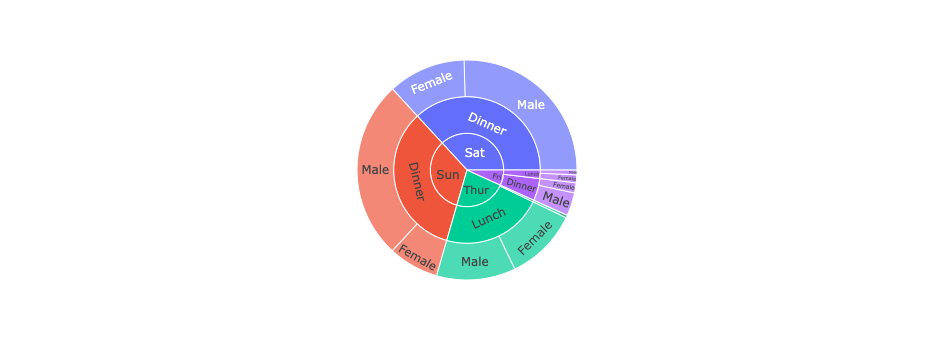

In [5]:
import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df, path=['day', 'time', 'sex'], values='total_bill')

display(df)
fig.show()

In [ ]:
def find_max(nums):
    max_num = float("-inf") # smaller than all other numbers
    for num in nums:
        if num > max_num:
    # (Fill in the missing line here)
return max_num

In [8]:
float("-inf") 

-inf

<a style = 'font-size:50px' href= 'https://www.thepythoncode.com/article/translate-text-in-python'>Biblioteca de Tradução de textos</a>